In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from PIL import Image
from tqdm import tqdm
import math
from keras.models import Sequential , Model , load_model

In [3]:
os.listdir('/content/drive/MyDrive/ProjetML/dataset/train')

['happy', 'neutral', 'sad', 'angry', 'disgusted', 'fearful', 'surprised']

In [4]:
dir_data = r'/content/drive/MyDrive/ProjetML/dataset/train'
catg = os.listdir(dir_data)
catg

['happy', 'neutral', 'sad', 'angry', 'disgusted', 'fearful', 'surprised']

## **Load Data**

In [44]:
def load_file():
  dir_='/content/drive/MyDrive/ProjetML/dataset/train'
  dir_list = os.listdir(dir_)
  image_list = []
  labels = []
  emotions = []
  l=0

  for em in dir_list :
    label = os.scandir(dir_+'/'+em)
    for filename in label:
       if filename.is_file():
            img=Image.open(filename.path,mode='r')
            img=img.resize(size=(120,120))
            img
            img=img.convert('L')
            image_list.append(np.array(img).flatten())
            labels.append(l)
    emotions.append(em)
    l=l+1
  return image_list , labels , emotions  




In [45]:
# data = load_data()
img_list , labels , emotions = load_file()

In [46]:
emotions

['happy', 'neutral', 'sad', 'angry', 'disgusted', 'fearful', 'surprised']

In [47]:
img_list

[array([131, 125, 109, ..., 180, 183, 186], dtype=uint8),
 array([77, 77, 74, ..., 57, 62, 63], dtype=uint8),
 array([189, 187, 183, ..., 155, 152, 151], dtype=uint8),
 array([ 10,  10,  10, ..., 123, 140, 146], dtype=uint8),
 array([162, 148, 114, ..., 254, 254, 254], dtype=uint8),
 array([0, 0, 0, ..., 7, 8, 8], dtype=uint8),
 array([115, 115, 115, ...,  67,  56,  51], dtype=uint8),
 array([142, 140, 135, ...,  14,  16,  17], dtype=uint8),
 array([27, 28, 31, ..., 53, 59, 61], dtype=uint8),
 array([152, 151, 149, ...,   5,   5,   5], dtype=uint8),
 array([108, 111, 117, ...,  32,  30,  29], dtype=uint8),
 array([5, 5, 8, ..., 3, 3, 3], dtype=uint8),
 array([153, 153, 153, ...,  24,  24,  24], dtype=uint8),
 array([ 59,  58,  55, ..., 110, 107, 107], dtype=uint8),
 array([132, 132, 134, ..., 175, 170, 170], dtype=uint8),
 array([112, 109, 104, ...,   6,  12,  14], dtype=uint8),
 array([24, 24, 25, ..., 24, 27, 29], dtype=uint8),
 array([51, 50, 47, ..., 29, 29, 29], dtype=uint8),
 arr

In [48]:
label = np.array(labels)
count = np.bincount(label)
for i in range (0,7):
  print(i,'=',count[i])

0 = 7215
1 = 4965
2 = 4830
3 = 3995
4 = 436
5 = 4097
6 = 3171


# `**DATA Distribution**`

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


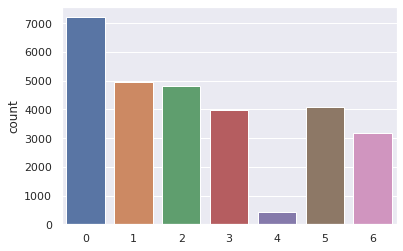

In [49]:
import seaborn as sns

sns.set_theme(style="darkgrid")
ax = sns.countplot(label)

# **Split Dataset into train , test**

In [51]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
num_classes = 7
Y = keras.utils.to_categorical(labels, num_classes)
x_train , x_test , y_train , y_test = train_test_split(img_data , Y , test_size = 0.2)

In [52]:
# encode label
def encode_y(y):
  y_encode = []
  n = len(y)
  for i in range(0,n):
    for j in range(0,7):
      if y[i][j] == 1 :
          clas = j
          continue
    y_encode.append(clas)
  return y_encode        

In [53]:
y_train_encode = encode_y(y_train)
y_test_encode = encode_y(y_test)



# **Data training distribution**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


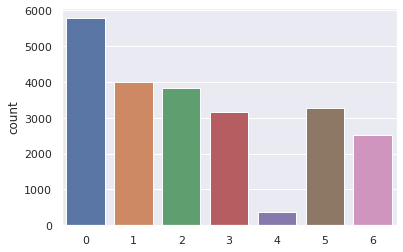

In [54]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y_train_encode)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


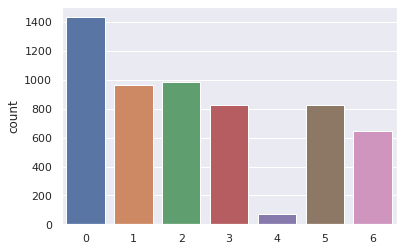

In [55]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(y_test_encode)

# **Extract Feature**

In [56]:
def load_images(image_data):
  images = []
  for sample in image_data:

    dim = (96,96)
    image = sample [:,:,0]
    resized = cv2.resize(image, dim , interpolation = cv2.INTER_AREA)
    image = np.reshape(resized, (96,96,1))
    images.append(image)
  images = np.array(images)/255
  return images  


In [57]:
def plot_sample(image , keypoint ,axis, title):
  image = image.reshape(96,96)
  axis.imshow(image , cmap="gray")
  axis.scatter(keypoint[0::2], keypoint[1::2], marker='x' , s=20)
  plt.title(title) 

# **Random Forest Model**

In [58]:
y_train_encode = encode_y(y_train)
y_test_encode = encode_y(y_test)


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train , y_train_encode)

RandomForestClassifier()

In [60]:
#Make predictions for the test set
y_pred_test = forest.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

#view accuracy score
accuracy_score(y_test_encode , y_pred_test)

0.4648206199930338

In [62]:
#view confusion matrix for test data and prediction
confusion_matrix(y_test_encode,y_pred_test)

array([[1136,  108,   99,   29,    0,   31,   31],
       [ 330,  416,  137,   23,    0,   31,   25],
       [ 329,  176,  348,   49,    0,   62,   20],
       [ 299,  135,  146,  161,    0,   49,   33],
       [  25,    7,    9,    1,   17,    5,    6],
       [ 247,  135,  130,   41,    0,  217,   56],
       [ 125,   56,   26,   21,    3,   38,  374]])

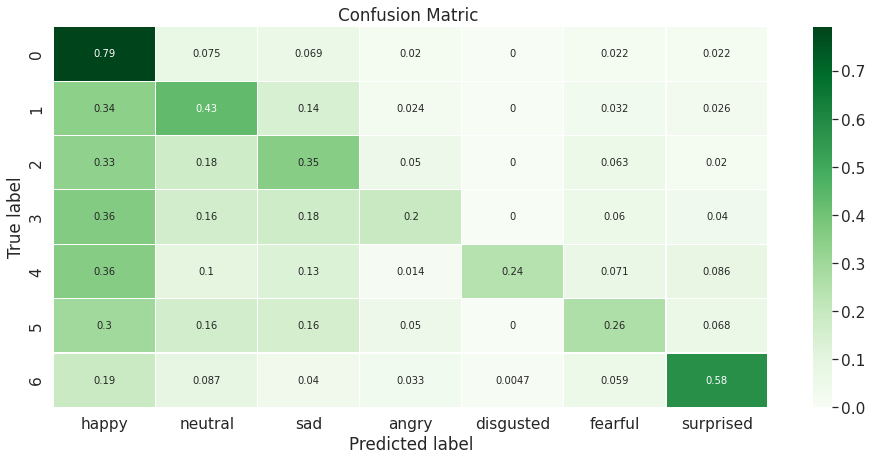

In [63]:
#get and reshape confusion matrix data
matrix = confusion_matrix(y_test_encode , y_pred_test)
matrix = matrix.astype('float')/ matrix.sum(axis=1)[:,np.newaxis]

#build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True , annot_kws={'size':10},
            cmap=plt.cm.Greens , linewidths=0.2)

#add labels to the plot
class_names = ['happy', 'neutral', 'sad', 'angry', 'disgusted', 'fearful', 'surprised']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks , class_names , rotation=25)
plt.xticks(tick_marks2 , class_names , rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matric ')
plt.show()

In [64]:
#view the classification report for test data and predictions
print(classification_report(y_test_encode , y_pred_test))

              precision    recall  f1-score   support

           0       0.46      0.79      0.58      1434
           1       0.40      0.43      0.42       962
           2       0.39      0.35      0.37       984
           3       0.50      0.20      0.28       823
           4       0.85      0.24      0.38        70
           5       0.50      0.26      0.34       826
           6       0.69      0.58      0.63       643

    accuracy                           0.46      5742
   macro avg       0.54      0.41      0.43      5742
weighted avg       0.48      0.46      0.44      5742

